In [41]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [42]:
IMG_SIZE=224
BATCH_SIZE=32

In [43]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [44]:
train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/Intern/Sara/brain_tumor_dataset",
                                                   target_size=(IMG_SIZE,IMG_SIZE),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='binary',
                                                   subset='training')

Found 915 images belonging to 2 classes.
Found 915 images belonging to 2 classes.


In [45]:
val_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Intern/Sara/brain_tumor_dataset",
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 227 images belonging to 2 classes.
Found 227 images belonging to 2 classes.


In [38]:


model=keras.Sequential([
    layers.Conv2D(32,(3,3), activation='relu',input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [33]:
model.fit(train_generator, epochs= 5, validation_data=val_generator, batch_size=BATCH_SIZE)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 310s 10s/step - accuracy: 0.5825 - loss: 1.1572 - val_accuracy: 0.6211 - val_loss: 0.6481
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 120s 4s/step - accuracy: 0.7662 - loss: 0.4936 - val_accuracy: 0.7445 - val_loss: 0.5163
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 122s 4s/step - accuracy: 0.8451 - loss: 0.3653 - val_accuracy: 0.6564 - val_loss: 0.5905
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 122s 4s/step - accuracy: 0.8588 - loss: 0.3076 - val_accuracy: 0.8414 - val_loss: 0.3591
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 0.9248 - loss: 0.1964 - val_accuracy: 0.8943 - val_loss: 0.2958


In [46]:
model.save('/content/drive/MyDrive/brain_tumor_dataset/BrainTumor.h5')

In [47]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt #visualization
import numpy as np
model=load_model('/content/drive/MyDrive/brain_tumor_dataset/BrainTumor.h5')
print("Model Loaded")

Model Loaded


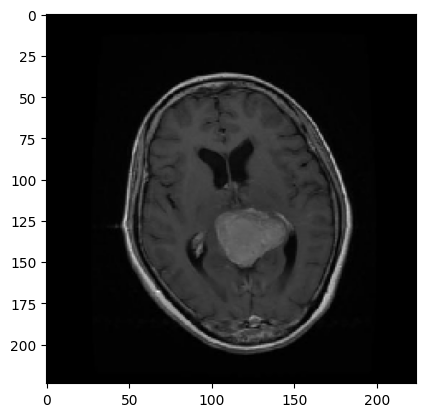

In [50]:
test_image_path='/content/drive/MyDrive/yes/Y1719.jpg'
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [51]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255

In [52]:
prediction=model.predict(img_array)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
[[0.49858466]]


In [53]:
if prediction>=0.5:
  print("you have brain tumor")
else:
  print("you do nothave brain tumor")

you do nothave brain tumor
